In [20]:
# prompt: connect colab with drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# prompt: read NYPD_Complaint_Data_Current_YTD.csv from My Drive/ Colab Notebooks

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NYPD_Complaint_Data_Current_YTD.csv')

<ipython-input-21-b01479684a04>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NYPD_Complaint_Data_Current_YTD.csv')


In [22]:

def dataPreprocessing(df):
    # remove duplicate columns
    df = df.loc[:, ~df.columns.duplicated()]

    # remove duplicate observations
    df = df.drop_duplicates()

    # remove NaN-values
    df = df.dropna()

    # Renaming columns
    df.columns = df.columns.str.replace(' ', '_').str.lower()

    # lowerr case
    df = df.applymap(lambda x: x.lower() if type(x) == str else x)

    # remove  extra spaces
    df = df.applymap(lambda x: x.strip() if type(x) == str else x)

    # binary values to 1 and 0
    binary_columns = ['crm_atpt_cptd_cd']
    df[binary_columns] = df[binary_columns].replace({'completed': 1, 'attempted': 0})

    # copy
    cleaned_df = df.copy()

    return cleaned_df


In [39]:
print(df.head())

   CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   736216184   09/30/2016     23:25:00   09/30/2016     23:25:00  09/30/2016   
1   294332956   09/30/2016     23:16:00   09/30/2016     23:21:00  09/30/2016   
2   852981427   09/30/2016     23:00:00   09/30/2016     23:05:00  09/30/2016   
3   369976063   09/30/2016     23:00:00          NaN          NaN  09/30/2016   
4   117213771   09/30/2016     23:00:00   09/30/2016     23:10:00  09/30/2016   

   KY_CD                     OFNS_DESC PD_CD                      PD_DESC  \
0    236             DANGEROUS WEAPONS   782     WEAPONS, POSSESSION, ETC   
1    344  ASSAULT 3 & RELATED OFFENSES   101                    ASSAULT 3   
2    235               DANGEROUS DRUGS   567  MARIJUANA, POSSESSION 4 & 5   
3    118             DANGEROUS WEAPONS   793         WEAPONS POSSESSION 3   
4    578                 HARRASSMENT 2   637   HARASSMENT,SUBD 1,CIVILIAN   

   ... ADDR_PCT_CD LOC_OF_OCCUR_DESC              

In [23]:
cleaned_data = dataPreprocessing(df)
print(cleaned_data)

        cmplnt_num cmplnt_fr_dt cmplnt_fr_tm cmplnt_to_dt cmplnt_to_tm  \
4179     563294526   09/27/2016     18:30:00   09/27/2016     20:38:00   
18140    231142311   09/17/2016     00:40:00   09/17/2016     00:58:00   
20883    686007613   09/15/2016     00:01:00   09/15/2016     00:05:00   
31274    953183434   09/07/2016     12:35:00   09/07/2016     12:40:00   
58976    220491080   08/17/2016     23:50:00   08/17/2016     23:53:00   
75986    991412007   08/04/2016     17:00:00   08/05/2016     08:40:00   
76278    464160009   08/05/2016     19:20:00   08/05/2016     19:30:00   
78962    162133911   08/03/2016     22:00:00   08/03/2016     22:30:00   
82764    269636132   07/29/2016     21:30:00   07/29/2016     22:00:00   
99738    239019908   07/19/2016     15:20:00   07/19/2016     15:25:00   
116769   499332951   07/06/2016     20:10:00   07/06/2016     20:15:00   
126311   596790227   06/29/2016     16:42:00   06/29/2016     17:01:00   
147245   432242604   06/14/2016     21

In [40]:


numerical_columns = ['x_coord_cd', 'y_coord_cd', 'latitude', 'longitude']

# Calculate summary
summary_stats = cleaned_data[numerical_columns].describe()


print(summary_stats)


         x_coord_cd     y_coord_cd   latitude  longitude
count  2.700000e+01      27.000000  27.000000  27.000000
mean   1.003829e+06  217910.370370  40.764762 -73.929279
std    1.626040e+04   27211.472148   0.074673   0.058713
min    9.515910e+05  171924.000000  40.638516 -74.117676
25%    9.976835e+05  192945.500000  40.696264 -73.951518
50%    1.002228e+06  231104.000000  40.801001 -73.935057
75%    1.016422e+06  239022.000000  40.822656 -73.883836
max    1.030347e+06  255651.000000  40.868313 -73.833609


In [44]:
print(cleaned_data.columns)


Index(['cmplnt_num', 'cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm', 'rpt_dt',
       'ky_cd', 'ofns_desc', 'pd_cd', 'pd_desc', 'crm_atpt_cptd_cd',
       'law_cat_cd', 'juris_desc', 'boro_nm', 'addr_pct_cd',
       'loc_of_occur_desc', 'prem_typ_desc', 'parks_nm', 'hadevelopt',
       'x_coord_cd', 'y_coord_cd', 'latitude', 'longitude', 'lat_lon'],
      dtype='object')


In [45]:
# Examine the distribution of categorical variables using frequency tables.
categorical_columns = ['cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm', 'rpt_dt',
                        'ky_cd', 'ofns_desc', 'pd_cd', 'pd_desc', 'crm_atpt_cptd_cd',
                        'law_cat_cd', 'juris_desc', 'boro_nm', 'addr_pct_cd',
                        'loc_of_occur_desc', 'prem_typ_desc', 'parks_nm', 'hadevelopt']

for column in categorical_columns:
    print(f"\nFrequency Table for {column}:\n")
    print(cleaned_data[column].value_counts())



Frequency Table for cmplnt_fr_tm:

18:30:00    1
23:40:00    1
18:40:00    1
22:15:00    1
19:15:00    1
16:35:00    1
19:50:00    1
19:30:00    1
01:18:00    1
19:48:00    1
16:25:00    1
20:25:00    1
16:45:00    1
16:28:00    1
00:40:00    1
21:40:00    1
16:42:00    1
20:10:00    1
15:20:00    1
21:30:00    1
22:00:00    1
19:20:00    1
17:00:00    1
23:50:00    1
12:35:00    1
00:01:00    1
18:35:00    1
Name: cmplnt_fr_tm, dtype: int64

Frequency Table for cmplnt_to_dt:

08/05/2016    2
09/27/2016    1
06/04/2016    1
01/10/2016    1
01/14/2016    1
03/11/2016    1
03/17/2016    1
03/22/2016    1
03/23/2016    1
05/01/2016    1
05/16/2016    1
05/24/2016    1
05/25/2016    1
06/08/2016    1
09/17/2016    1
06/10/2016    1
06/14/2016    1
06/29/2016    1
07/06/2016    1
07/19/2016    1
07/29/2016    1
08/03/2016    1
08/17/2016    1
09/07/2016    1
09/15/2016    1
01/08/2016    1
Name: cmplnt_to_dt, dtype: int64

Frequency Table for cmplnt_to_tm:

22:30:00    2
16:42:00    2
20:3

In [32]:
# Summary statistics for numerical columns
numerical_columns = ['x_coord_cd', 'y_coord_cd', 'latitude', 'longitude']
summary_stats = cleaned_data[numerical_columns].describe()
print("Summary Statistics for Numerical Columns:")
print(summary_stats)

# Frequency tables for categorical columns
categorical_columns = ['ky_cd', 'ofns_desc', 'pd_cd', 'pd_desc', 'crm_atpt_cptd_cd',
                        'law_cat_cd', 'juris_desc', 'boro_nm', 'loc_of_occur_desc',
                        'prem_typ_desc', 'parks_nm', 'hadevelopt']

for column in categorical_columns:
    print(f"\nFrequency Table for {column}:\n")
    print(cleaned_data[column].value_counts())

Summary Statistics for Numerical Columns:
         x_coord_cd     y_coord_cd   latitude  longitude
count  2.700000e+01      27.000000  27.000000  27.000000
mean   1.003829e+06  217910.370370  40.764762 -73.929279
std    1.626040e+04   27211.472148   0.074673   0.058713
min    9.515910e+05  171924.000000  40.638516 -74.117676
25%    9.976835e+05  192945.500000  40.696264 -73.951518
50%    1.002228e+06  231104.000000  40.801001 -73.935057
75%    1.016422e+06  239022.000000  40.822656 -73.883836
max    1.030347e+06  255651.000000  40.868313 -73.833609

Frequency Table for ky_cd:

235    8
341    3
236    3
117    2
118    2
126    1
344    1
351    1
106    1
109    1
363    1
111    1
359    1
340    1
Name: ky_cd, dtype: int64

Frequency Table for ofns_desc:

dangerous drugs                   10
dangerous weapons                  5
petit larceny                      3
miscellaneous penal law            1
assault 3 & related offenses       1
criminal mischief & related of     1
felony as

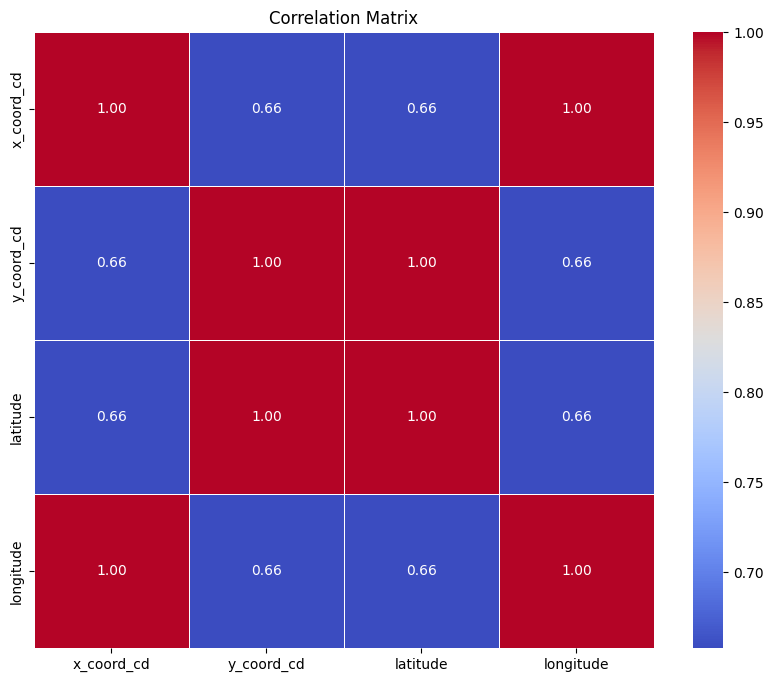

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is the DataFrame after preprocessing
# If you haven't run the previous code, make sure to execute it first.

# Selecting numerical columns for correlation analysis
numerical_columns = ['x_coord_cd', 'y_coord_cd', 'latitude', 'longitude']

# Extracting a subset of data with numerical columns
numerical_data = cleaned_data[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [47]:
print(cleaned_data.columns)


Index(['cmplnt_num', 'cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm', 'rpt_dt',
       'ky_cd', 'ofns_desc', 'pd_cd', 'pd_desc', 'crm_atpt_cptd_cd',
       'law_cat_cd', 'juris_desc', 'boro_nm', 'addr_pct_cd',
       'loc_of_occur_desc', 'prem_typ_desc', 'parks_nm', 'hadevelopt',
       'x_coord_cd', 'y_coord_cd', 'latitude', 'longitude', 'lat_lon'],
      dtype='object')


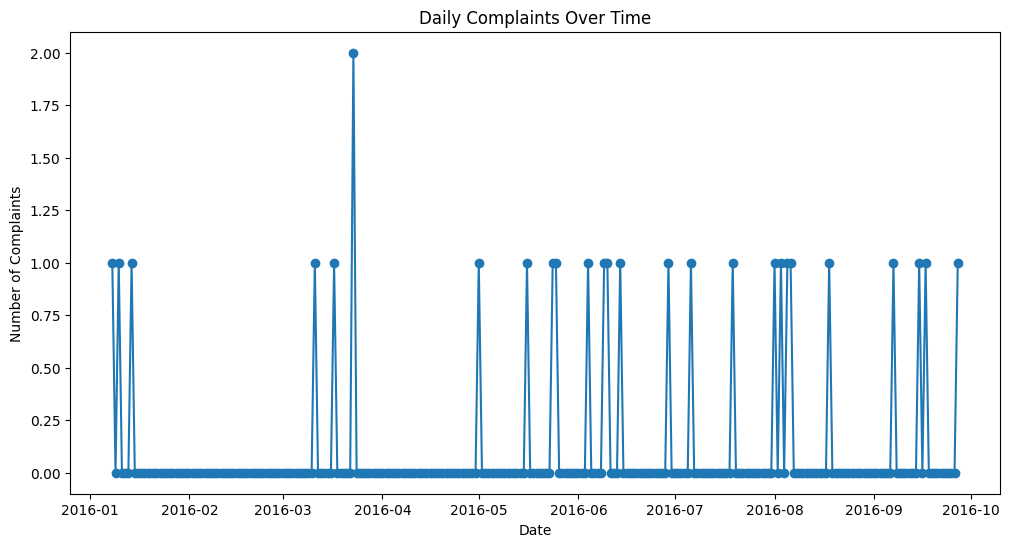

In [48]:
import matplotlib.pyplot as plt

# Convert 'rpt_dt' to datetime format
cleaned_data['rpt_dt'] = pd.to_datetime(cleaned_data['rpt_dt'], format='%m/%d/%Y')

# Set 'rpt_dt' as the index
cleaned_data.set_index('rpt_dt', inplace=True)

# Resample data to daily frequency
daily_complaints = cleaned_data.resample('D').size()

# Plotting daily complaints
plt.figure(figsize=(12, 6))
plt.plot(daily_complaints, marker='o', linestyle='-')
plt.title('Daily Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


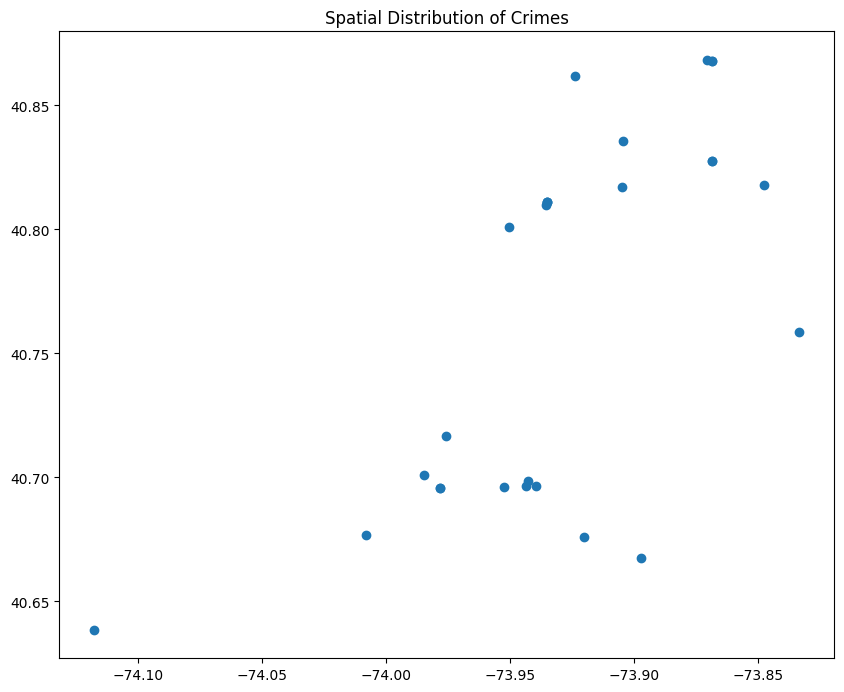

In [55]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'longitude' and 'latitude' columns are available
geometry = [Point(xy) for xy in zip(cleaned_data['longitude'], cleaned_data['latitude'])]
geo_df = gpd.GeoDataFrame(cleaned_data, geometry=geometry)

# Plotting spatial distribution
geo_df.plot(figsize=(10, 10))
plt.title('Spatial Distribution of Crimes')
plt.show()


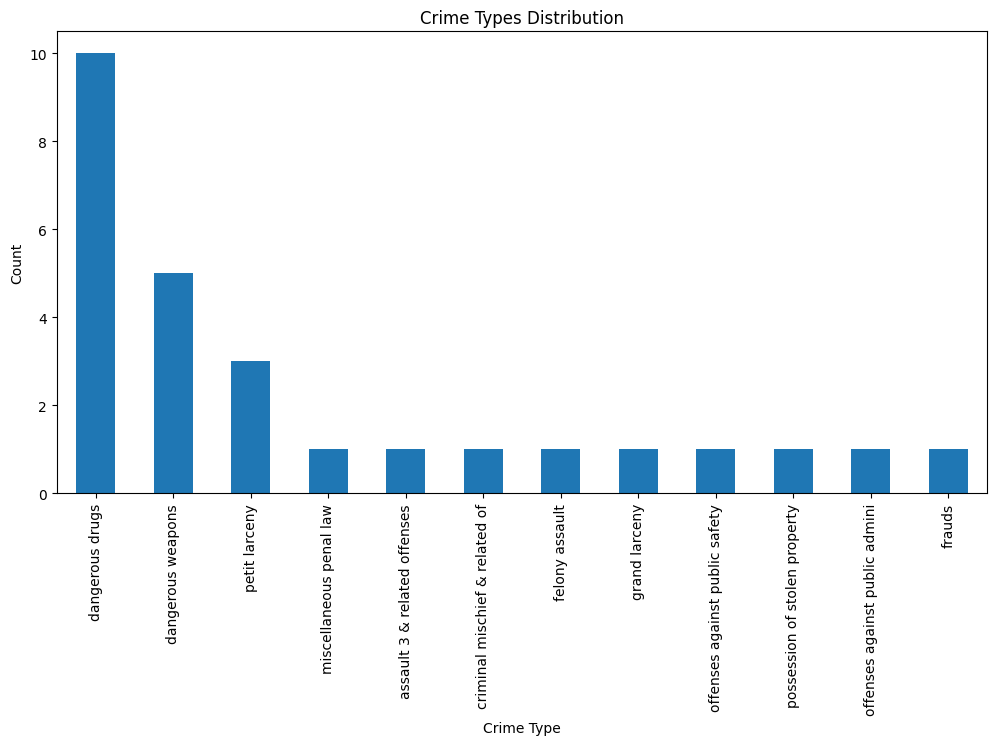

In [50]:
# Assuming 'ofns_desc' is a categorical column
plt.figure(figsize=(12, 6))
cleaned_data['ofns_desc'].value_counts().plot(kind='bar')
plt.title('Crime Types Distribution')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


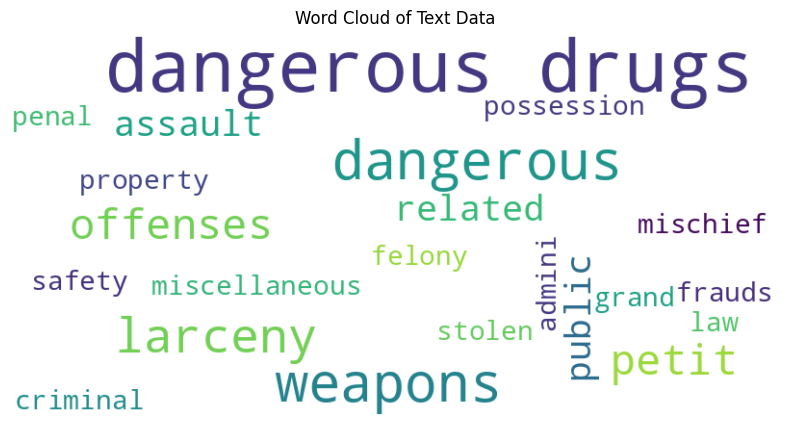

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'ofns_desc' contains textual data
text_data = ' '.join(cleaned_data['ofns_desc'].dropna())

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


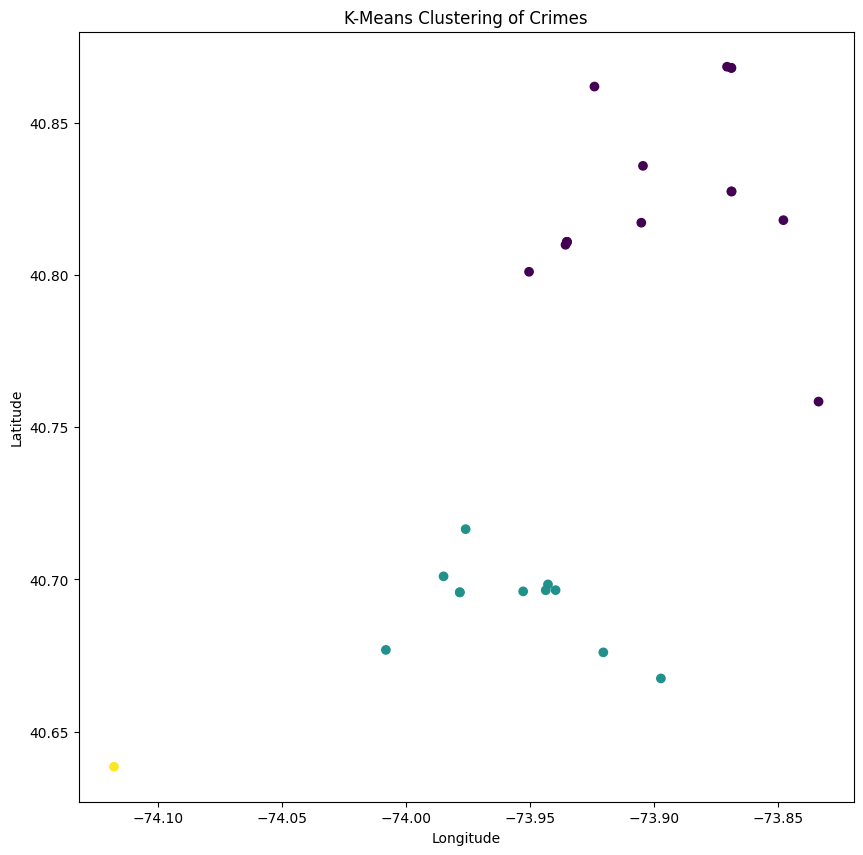

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'features' contains the features for clustering
features = cleaned_data[['latitude', 'longitude']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_data['cluster'] = kmeans.fit_predict(features_scaled)

# Plotting clusters
plt.figure(figsize=(10, 10))
plt.scatter(cleaned_data['longitude'], cleaned_data['latitude'], c=cleaned_data['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
